## Part I-Data Analysis

In [77]:
import numpy as np
import pandas as pd
import pickle, math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import MultipleLocator
%matplotlib inline

In [116]:
# Load Data
import pandas as pd

train_data = pd.read_csv('./training/data_train.csv', names=['country','sku_id','title','cat_lv1','cat_lv2','cat_lv3','short_desc','price','prod_type'])
clarity_label = pd.read_csv('./training/clarity_train.labels', names=['clarity'])
conciseness_label = pd.read_csv('./training/conciseness_train.labels', names=['conciseness'])
valid_data = pd.read_csv('./validation/data_valid.csv', names=['country','sku_id','title','cat_lv1','cat_lv2','cat_lv3','short_desc','price','prod_type'])

train_data.head(3)


,country,sku_id,title,cat_lv1,cat_lv2,cat_lv3,short_desc,price,prod_type
0,my,AD674FAASTLXANMY,Adana Gallery Suri Square Hijab – Light Pink,Fashion,Women,Muslim Wear,<ul><li>Material : Non sheer shimmer chiffon</...,49.00,local
1,my,AE068HBAA3RPRDANMY,Cuba Heartbreaker Eau De Parfum Spray 100ml/3.3oz,Health & Beauty,Bath & Body,Hand & Foot Care,Formulated with oil-free hydrating botanicals/...,128.00,international
2,my,AN680ELAA9VN57ANMY,Andoer 150cm Cellphone Smartphone Mini Dual-He...,"TV, Audio / Video, Gaming & Wearables",Audio,Live Sound & Stage,<ul> <li>150cm mini microphone compatible for ...,25.07,international


### Correlation Analysis 1: Categorical Features 

In [79]:
def getCategoricalFeatures(train_data, cat_columns):
    map2no, data = {}, {}
    for col in cat_columns: data[col] = []; map2no[col] = {}
    for i, row in train_data.iterrows():
        for col in cat_columns:
            if not row[col] in map2no[col].keys(): map2no[col][row[col]] = len(map2no[col])
            data[col].append(map2no[col][row[col]])
    return data

In [80]:
cat_columns = ['country', 'sku_id', 'cat_lv1', 'cat_lv2', 'cat_lv3', 'prod_type']
data = getCategoricalFeatures(train_data, cat_columns)
subdata = []    
for col in cat_columns: subdata.append(data[col])
    
subdata.append(conciseness_label['conciseness'].values.tolist())    
subdata.append(clarity_label['clarity'].values.tolist())  

catData = pd.DataFrame( subdata ).transpose()
catData.columns = cat_columns+['conciseness','clarity']
catData.head(3)

,country,sku_id,cat_lv1,cat_lv2,cat_lv3,prod_type,conciseness,clarity
0,0,0,0,0,0,0,1,1
1,0,1,1,1,1,1,1,1
2,0,2,2,2,2,1,0,1


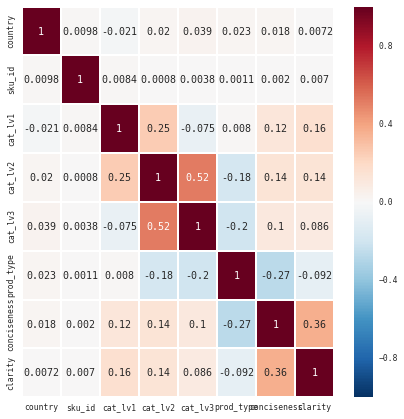

In [105]:
import seaborn as sns
#corr_df=pd.DataFrame(columns=['feature','pearson', 'kendall', 'spearman'])
corr=catData[cat_columns+['conciseness','clarity']].corr(method='pearson')
fig, ax = plt.subplots(figsize=(7,7))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

### Correlation Analysis 2: Numerical Features 

In [111]:
def getPriceFeatures(train_data, nm_columns):
    curreny = {'my':0.32, 'ph':0.028, 'sg':1.0}
    map2no, data = {}, {}
    for col in nm_columns: data[col] = []; map2no[col] = {}
    for i, row in train_data.iterrows():
        price = row['price']
        data['price'].append(price)
        data['price_sg'].append(price * curreny[row['country']])
    return data

In [112]:
nm_columns = ['price', 'price_sg']
data = getPriceFeatures(train_data, nm_columns)
subdata = []    
for col in nm_columns: subdata.append(data[col])
    
subdata.append(conciseness_label['conciseness'].values.tolist())    
subdata.append(clarity_label['clarity'].values.tolist())  

nmData = pd.DataFrame( subdata ).transpose()
nmData.columns = nm_columns+['conciseness','clarity']


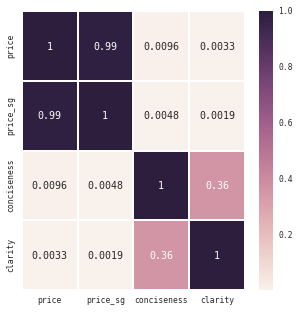

In [114]:
nm_corr=nmData[nm_columns+['conciseness','clarity']].corr(method='pearson')
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(nm_corr, annot=True, linewidths=.5, ax=ax)

### Correlation Analysis 3: Text Features

In [143]:
import re
def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    return cleantext   

def getTextFeatures(train_data, txt_columns):    
    map2no, data = {}, {}
    for col in txt_columns: data[col] = []; map2no[col] = {}
    for i, row in train_data.iterrows():
        title = cleanhtml(row['title'])
        print row['short_desc']
        desc = cleanhtml(row['short_desc'])
        data['titleLen'].append(len(title))
        data['descLen'].append(len(desc))
    return data
    

In [144]:
txt_columns = ['titleLen', 'descLen']
data = getTextFeatures(train_data, txt_columns)


subdata = []    
for col in txt_columns: subdata.append(data[col])
    
subdata.append(conciseness_label['conciseness'].values.tolist())    
subdata.append(clarity_label['clarity'].values.tolist())  

txtData = pd.DataFrame( subdata ).transpose()
txtData.columns = txt_columns+['conciseness','clarity']


UnboundLocalError: local variable 'desc' referenced before assignment

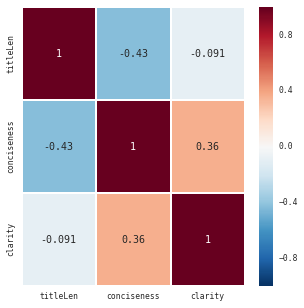

In [138]:
txt_corr=txtData[txt_columns+['conciseness','clarity']].corr(method='pearson')
fig, ax = plt.subplots(figsize=(5,5))         # Sample figsize in inches
sns.heatmap(txt_corr, annot=True, linewidths=.5, ax=ax)